In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- Dividing the dataset into x and y

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

- As the values in the State featrure are repeating with three values only so its better to convert that feature into CATEGORICAL FEATURE

In [4]:
states = pd.get_dummies(x['State'], drop_first=1)

- Drop the state feature with the repeating featrures and encode that feature into categorical feature

In [5]:
x = x.drop('State', axis = 1)

- Concatenating the categorical feature OR dummy feature

In [6]:
# This method is called as ONE HOT ENCODING
x = pd.concat([x,states], axis =1)

In [7]:
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


- Splitting the dataset into training and test dataset

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=5)

- Fitting multiple linear regression to the training dataset

In [19]:
len(x_train),len(x_test),len(y_train),len(y_test)

(45, 5, 45, 5)

In [20]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

- Predicting the test results

In [21]:
y_pred = linear_regressor.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [23]:
score

0.9756610834655747

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

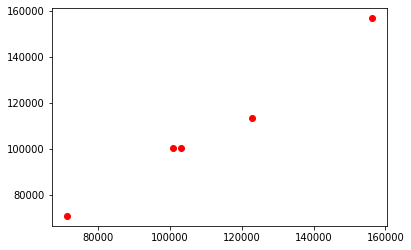

In [25]:
plt.scatter(y_test,y_pred, c= 'red')

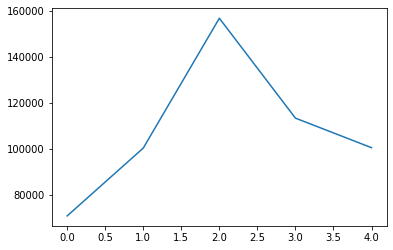

In [26]:
plt.plot(y_pred)

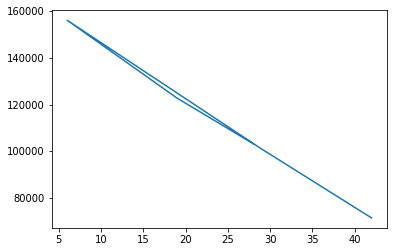

In [27]:
plt.plot(y_test)